<center>
<img src="https://ww.namu.la/s/fb53cf6ba580a2c71eed4432a49f1cfda915107c5eabd4461bfa110cc273f84286fa3af9ecb0770c1f5af47176019ef397385a58d57fe43e52237c0557f0599fdb6f1c9ba224709d18d417793830750276973b3432c37ec5a0816b788c0917f8c04bd938c3d0d4ce795e7247e66eb005" width="300" height="300"><br>
</center>


# 타이타닉 호에서 탑승했던 사람들의 정보를 바탕으로 생존자 가려내기
타이타닉의 생존자 그룹과 비생존자 그룹을 0~4단계 Step으로 살펴보자. 입문자용으로 쉽게 접근 할 수 있도록 작성해보았다.
본 커널은 다음 참고자료를 통해 구성해 보았다. kaggle 제출하는 목적도 포함이기 때문에 제출하는 방법도 출처를 남겼습니다.

- 책(이것이 데이터 분석이다 with 파이썬)
- [Chapter 4 . titanic 생존자 가려내기](https://seethefuture.tistory.com/50?category=858770)
- [[수비니움의 캐글 따라하기] 타이타닉 : Beginner Ver.](https://www.kaggle.com/subinium/subinium-tutorial-titanic-beginner)
- [[skyepodium.log] 캐글은 처음이라](https://velog.io/@skyepodium/%EC%BA%90%EA%B8%80-%EC%82%AC%EC%9A%A9%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%B4-%EC%95%8C%EC%95%84%EB%B3%B4%EC%9E%90) kaggle 제출법



- Step 0 도메인 지식 : 분석하기에 도움을 주는 도메인 지식을 간단히 살펴본다.
- Step 1 탐색: 타이타닉 데이터 살펴보기 (생존에 영향을 주는 피처 시각화로 도메인 지식과 비교해보자)
- Step 2 데이터처리: 결측치 처리하기
- Step 3 데이터나누기
- Step 4 머신러닝 알고리즘 적용하기 (로지스틱 회귀, SVC, 랜덤 포레스트, K-최근접 이웃 알고리즘)
- Step 5 kaggle 제출하기

### Step 0 도메인 지식
​
타이타닉 생존자 분석하기에 앞서 도움을 주는 도메인지식이 있다. 간단하게 요약해보자 한다.
- 1912년 시대적 배경에는  “Lady First”라는 개념이 존재 했다. 어린이와 여자부터 우선적으로 구조 했다고 한다.  “Lady First”라는 개념이 없었다면 급박한 상황에서 구명정으로 달려들때 힘센 남성이 구명정을 차지할 가능성이 높아 생존에 유리했을 것이다.
​
- 타이타닉호에는 쉽게말해 사회적위치가 높은 사람, 부자, 일반인, 가난한 이민자 등 여러 부류 사람들이 있었고, 객실도 1등실~3등실이 있었다.
​
- 3등실은 여러 구역이 철창으로 막혀 제한되어 있었고 배가 미로처럼 복잡했기 때문에 탈출에 지장을 빚었으며, 3등실은 승객들 중에는 영어를 잘 하지 못하는 승객들도 많았다.

​
### Step 1 탐색: 타이타닉 데이터 살펴보기
타이타닉 데이터셋의 구성은 다음과 같다.
​
​
train 셋은 예측하기 위해 임의로 만들어 놓은 원본 데이터들을 큰 비율로 모아놓은 데이터이다.
test 셋은 train셋에서 분석을 위한 스크립트를 생성해서 실제로 맞는지 확인하기 위한 데이터 셋이다.
​
​
이 두 셋은 모두 공통된 컬럼을 가지고 있으며, 그럼 컬럼들이 어떻게 이루어져 있는지 확인해보겠다.
(train셋,test셋 :  검증하기위해Survived 만 따로 생성됨)
​
​
​
​
분석에 사용할 데이터는 총 2개의 파일로 구성되어있다. 하나는 분류 모델의 학습을 위한 학습 데이터셋, 그리고 나머지 하나는 테스트를 위한 테스트 데이터셋이다. 
​
​
- 타이타닉 데이터셋의 기본 정보 구하기
​
먼저 필요한 라이브러리를 import하고, 데이터(train.csv, test.csv) 파일을 pd.read_csv 를 이용해서 불러오자.

In [48]:
# 필요한 라이브러리 불러오기

## 데이터 분석 관련
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

## 데이터 시각화 관련
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # matplotlib의 스타일에 관련한 함
## 그래프 출력에 필요한 Python 명령어
%matplotlib inline 

## Scikit-Learn의 다양한 머신러닝 모듈
## 분류 알고리즘 중에서 선형회귀, 서포트벡터머신, 랜덤포레스트, K-최근접이웃 알고리즘을 사용
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [49]:
train = pd.read_csv('./kaggle_titanic/train.csv')
test = pd.read_csv('./kaggle_titanic/test.csv')

데이터가 제대로 불러와졌는지를 확인을 위해 train.head()를 실행시켜보자. 불러온 train이라는 dataframe 중에서 앞의 5개의 열을 출력시킬 수 있다.

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
print(train.info())
print("-----------------------------------------")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pas

위 결과에서 각각의 데이터 개수는 891개, 418개인 것을 확인할 수 있다. 특성은 각각 12개 11개입니다. 그 이유는 학습 데이터는 생존 여부를 알고 있기 때문이다. 결측치도 확인 할 수 있지만 아래의 코드로 자세히 살펴보자.

- 결측치가 정확히 몇개 인지 확인해 보자

In [52]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

여기서 주의깊게 봐야할 부분은 다음과 같다.
#### 결측값이 존재하는 피처를 전처리하는 방법

- 결측이 존재하는 데이터들을 삭제하는 방법
- 평균값, 혹은 중앙값이나 최빈값 등의 임의의 수치로 채워 넣는 방법



간단하게 변수들에 대해서 알아보자.

- PassengerId : 승객 번호

- Survived: 생존 여부(0은 사망, 1은 생존; train 데이터에서만 제공),( 예측하고자 하는 변수, 종속변수 이다. )

- Pclass: 승선권 클래스 (1에 가까울 수록 높음)

- Name: 승객이름

- Sex: 승객 성별

- Sibsp: 자매, 배우자와 같이 승선해있는 사람의 수를 말한다

- Parch: 타이타닉에 탑승 한 부모 / 아이들의 수 (일부 어린이는 유모와 동행했기 때문에 그들은 parch = 0)

- Ticket: 티켓번호

- Fare: 여객 요금

- Cabin: 선실 번호

- Embarked: 승선한 장소를 말한다. C = Cherbourg, Q = Queenstown, S = Southampton


Cavin, Name은 지금 당장 분석에 활용 할 수 없어 뒤쪽에서 버릴 것이다.(머신러닝에서 사용할 수 있게 숫자 변환하는 것이 까다롭기때문) Tiket은 큰 의미를 가지고 있지 않다.PassengerId은 승객의 고유번호로 의미가 없다. 



- 불필요한 피처 제거하기 (PassengerId, Name, Tiket, Cabin) 결과물은'PassengerId', 'Survived' 요소가 필요하므로 학습데이터에서만 삭제합니다.


In [54]:
#  train 데이터셋에서 'PassengerId',Name', 'Ticket' ',Cabin'피처를 제거한다.
train = train.drop(['PassengerId','Name', 'Ticket','Cabin'], axis = 1 )
test = test.drop(['Name', 'Ticket','Cabin'], axis= 1)

In [55]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [56]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


다음으로 각 피처가 분류 분석에 미칠 영향에 대해 탐색해 본다. 이를 탐색하는 가장 좋은 방법은 데이터를 그룹(생존자 그룹/비생존자 그룹)으로 나누어 피처의 그룹 간 차이를 탐색하는 것이다. 생존 여부(생존=1, 아닌 경우=0)인 survived를 그룹으로 하여 pclass 피처의 그룹별 분포를 출력한 결과는 아래과 같다. seaborn의 countplot이라는 함수를 사용하면 아래와 같은 그래프를 출력 할 수 있다. 그룹 비율은 약 3:5 정도로 나타났고, 그룹별 pclass의 부포는 상이하게 나타났다. 이를 통해 pclass 피처는 생존자 분류에 유의미한 영향을 미친다는 가설을 세워 볼 수 있다.

- 탐색적 데이터 분석하기 

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:>

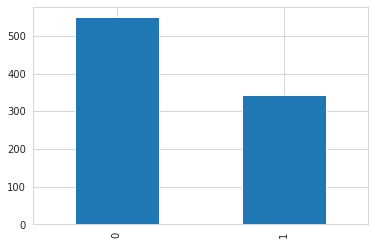

In [57]:
print(train['Survived'].value_counts())
train['Survived'].value_counts().plot.bar()

In [58]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64


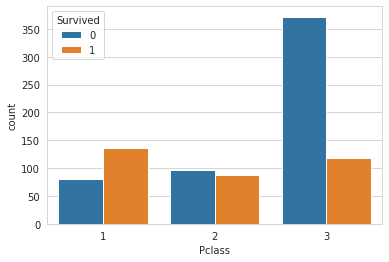

In [59]:
# survived 피처를 기준으로 그룹을 나누어 그룹별 pclass 피처의 분포를 살펴보자.
print(train['Pclass'].value_counts())
ax = sns.countplot(x = 'Pclass', hue = 'Survived', data= train)

- Pclass가 3인 사람들의 수가 가장 많았으며, Pclass가 작을수록 (사회경제적 지위가 높을수록) 생존 비율이 높다는 것을 알 수 있다.


male      577
female    314
Name: Sex, dtype: int64


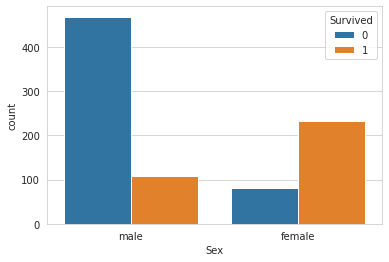

In [60]:
# survived 피처를 기준으로 그룹을 나누어 그룹별 Sex 피처의 분포를 살펴보자.
print(train['Sex'].value_counts())
ax = sns.countplot(x='Sex', hue='Survived', data = train)


- 남성보다 여성이 생존 비율이 높다는 것을 알 수 있다.  (ladies first 라는 시대적 배경에 '여자와 아이들 먼저'라는 규칙이 있었다고 한다.)


S    644
C    168
Q     77
Name: Embarked, dtype: int64


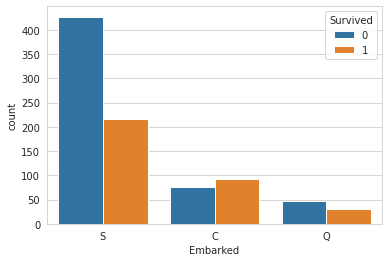

In [61]:
# survived 피처를 기준으로 그룹을 나누어 그룹별 Embarked 피처의 분포를 살펴보자.
print(train['Embarked'].value_counts())
ax = sns.countplot(x='Embarked', hue='Survived', data = train)

- Southampton에서 선착한 사람이 가장 많았으며, Cherbourg에서 탄 사람 중에서는 생존한 사람의 비율이 높았고, 나머지 두 선착장에서 탄 사람들은 생존한 사람보다 그렇지 못한 사람이 조금 더 많은것을 확인 할 수 있다.

Pclass,Sex,Embarked는 유의미한 영향을 미치는 것을 확인 했다. 
다음으로 age, sibsp와 같은 수치형 피처들에 대한 탐색을 진행한다. 다음의 코드는 이러한 피처들을 탐색할 수 있는 자동화 함수 vaild_feature()를 작성한 것이다. 함수가 실행하는 내용은 다음과 같다.

- 두 그룹 간의 분포를 비교하는 그래프를 출력한다.
- 두 그룹 각각의 표준편차를 출력한다.
- 두 그룹 간의 T-test 검정을 실시하여 출력한다.
- 두 그룹 각각에 Shapiro-wilk 검정을 실시하여 출력한다.

In [62]:
# 변수 탐색 작업 자동화하기
from scipy import stats

# 두 집단의 피처를 비교해주며 탐색작업을 자동화하는 함수를 정의
def valid_features(df, col_name, distribution_check=True):
    
    # 두 집단 (Survived=1, Survived=0)의 분포 그래프를 출력
    g = sns.FacetGrid(df, col='Survived')
    g.map(plt.hist, col_name, bins=30)

    # 두 집단 (Survived=1, Survived=0)의 표준편차를 각각 출력
    titanic_Survived = df[df['Survived']==1]
    titanic_Survived_static = np.array(titanic_Survived[col_name])
    print("data std is", '%.2f' % np.std(titanic_Survived_static))
    titanic_n_Survived = df[df['Survived']==0]
    titanic_n_Survived_static = np.array(titanic_n_Survived[col_name])
    print("data std is", '%.2f' % np.std(titanic_n_Survived_static))
    
     # T-test로 두 집단의 평균 차이를 검정한다
    tTestResult = stats.ttest_ind(titanic_Survived[col_name], titanic_n_Survived[col_name])
    tTestResultDiffVar = stats.ttest_ind(titanic_Survived[col_name], titanic_n_Survived[col_name], equal_var=False)
    print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
    print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)
    
    if distribution_check:
        # Shapiro-Wilk 검정 : 분포의 정규성 정도를 검증한다
        print("The w-statistic and p-value in Survived %.3f and %.3f" % stats.shapiro(titanic_Survived[col_name]))
        print("The w-statistic and p-value in Non-Survived %.3f and %.3f" % stats.shapiro(titanic_n_Survived[col_name]))

아래의 실행 결과는 valid_features()를 실행한 것이다. 이를 통해 살펴본 피처는 Age, sibsp, Parch, Fare 피처이다.

data std is 14.93
data std is 14.16
The t-statistic and p-value assuming equal variances is -2.067 and 0.039.
The t-statistic and p-value not assuming equal variances is -2.046 and 0.041
The w-statistic and p-value in Survived 0.983 and 0.001
The w-statistic and p-value in Non-Survived 0.969 and 0.000
data std is 0.71
data std is 1.29
The t-statistic and p-value assuming equal variances is -1.054 and 0.292.
The t-statistic and p-value not assuming equal variances is -1.194 and 0.233
data std is 0.77
data std is 0.82
The t-statistic and p-value assuming equal variances is 2.442 and 0.015.
The t-statistic and p-value not assuming equal variances is 2.479 and 0.013
data std is 66.50
data std is 31.36
The t-statistic and p-value assuming equal variances is 7.939 and 0.000.
The t-statistic and p-value not assuming equal variances is 6.839 and 0.000


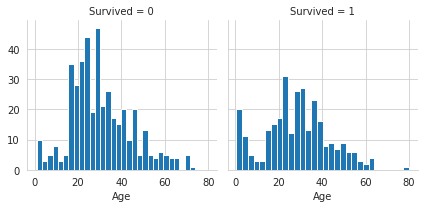

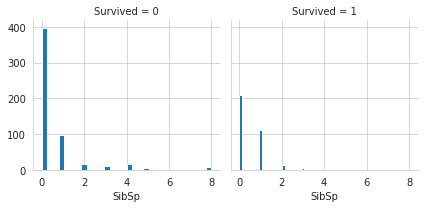

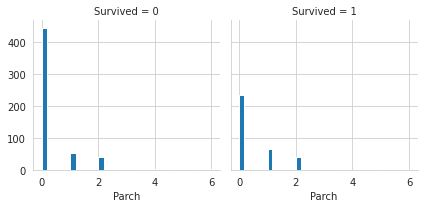

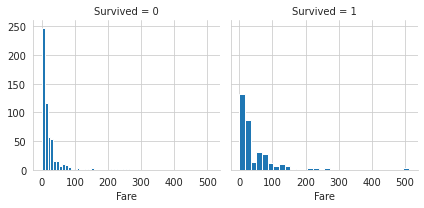

In [63]:
# 앞서 정의한 valid_features 함수를 실행한다. Age 피처를 탐색한다.
valid_features(train[train['Age']>0], 'Age', distribution_check=True)

# 앞서 정의한 valid_features 함수를 실행한다.  Sibsp 피처를 탐색한다.
valid_features(train, 'SibSp', distribution_check=False)

# 앞서 정의한 valid_features 함수를 실행한다. Parch 피처를 탐색한다.
valid_features(train, 'Parch', distribution_check=False)

# 앞서 정의한 valid_features 함수를 실행한다. fare 피처를 탐색한다.
valid_features(train, 'Fare', distribution_check=False)

- Age특성을 보면 두 그룹 간의 평균 차이가 없기 때문에 생존자 분류에 미치는 영향력이 낮을 것이라 예상 할 수 있다. (나이가 적을 경우는 더 살펴볼 필요가 있어보인다.)

- 반면 SibSp,Parch,Fare는 두 그룹 간의 평균 차이가 어느 정도 존재 한다는 것을 알 수 있다.

지금까지 탐색한 데이터 특성들을 간략하게 정리해보자.

- 성별은 여성이 생존자 비율이 높음 (시대적 배경)
- Pclass가 낮을 수록 생존자 비율이 높음 (1,2등실보다 3등실의 사망률이 월등하게 높다. 3등실 선실이 구명정에서 가장 떨어져 있고 복잡하게 얽혀있는 구조인 데다가 출입이 제한된 곳이 많았기 때문에 이런 일이 생긴 것. 거기다가 외국인이 많아 영어가 통하지 않아 언어적으로도 문제가 있었다.) 
- Embarked는 Cherbourg 선착장이 생존자 비율이 높음
- Fare이 높을 수록 생존자 비율이 높음
- 그리고 형제, 자매, 배우자, 부모, 자녀와 함께 배에 탔다면 생존자 비율이 높음 



### Step 2 데이터 처리하기

- Pclass
- Sex
- Age
- SibSp
- Parch
- Fare
- Embarked
- 나머지 피처는 위에서 제거 했었음.


#### Pclass
Pclass는 서수형 데이터이다. (1등석, 2등석, 3등석의 정보) 처음에 확인시에 데이터가 비어있지 않은 것을 확인했었다.

데이터를 변환하자. 우선 각 unique한 value에 대한 카운팅은 value_counts() 메서드로 확인할 수 있다.

In [64]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Pclass는 1, 2, 3 등급은 경우에 따라 다를 수 있지만 연속적인 정보가 아니며, 각 차이 또한 균등하지 않다. 그렇기에 범주형(카테고리) 데이터로 인식하고 인코딩해야합니다.

이 데이터는 범주형 데이터이므로 one-hot-encoding을 pd.get_dummies() 메서드로 인코딩하자.

In [65]:
pclass_train_dummies = pd.get_dummies(train['Pclass'])
pclass_test_dummies = pd.get_dummies(test['Pclass'])

train.drop(['Pclass'], axis=1, inplace=True)
test.drop(['Pclass'], axis=1, inplace=True)

train = train.join(pclass_train_dummies)
test = test.join(pclass_test_dummies)

- Pclass의 원본을 없애고, 범주형 데이터로 변환했다.

#### Sex

Sex는 성별로 one-hot-encoding을 진행하자.

In [66]:
sex_train_dummies = pd.get_dummies(train['Sex'])
sex_test_dummies = pd.get_dummies(test['Sex'])

sex_train_dummies.columns = ['Female', 'Male']
sex_test_dummies.columns = ['Female', 'Male']

train.drop(['Sex'], axis=1, inplace=True)
test.drop(['Sex'], axis=1, inplace=True)

train = train.join(sex_train_dummies)
test = test.join(sex_test_dummies)

#### Age

나이는 연속형 데이터이므로, 큰 처리가 필요없다. 하지만 결측치를 처리해야 한다. 
평균값으로 채우고자 한다. 데이터의 통일성을 가지기 위해 train 데이터셋의 평균값으로 훈련하고, 테스트 데이터셋을 채운다.

In [67]:
train["Age"].fillna(train["Age"].mean() , inplace=True)
test["Age"].fillna(train["Age"].mean() , inplace=True)

#### SibSp & Panch
형제 자매와 부모님은 가족으로 함께 처리하는 방법이 있지만, 그대로 진행하는 것으로 판단했다.

#### Fare
Fare은 탑승료이다. test 데이터셋에 1개의 데이터가 비어있습니다. 결측치를 처리해야 한다. 디카프리오 처럼 무단 탑승이라고 보고 진행하려한다.

In [68]:
test["Fare"].fillna(0, inplace=True)

#### Embarked
Embarked는 탑승 항구를 의미한다. 우선 데이터를 확인해보자.

In [69]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [70]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

S가 대다수이고 결측치가 있다. 이것을 S로 채우고 시작하자.

In [71]:
train["Embarked"].fillna('S', inplace=True)
test["Embarked"].fillna('S', inplace=True)

In [72]:
embarked_train_dummies = pd.get_dummies(train['Embarked'])
embarked_test_dummies = pd.get_dummies(test['Embarked'])

embarked_train_dummies.columns = ['S', 'C', 'Q']
embarked_test_dummies.columns = ['S', 'C', 'Q']

train.drop(['Embarked'], axis=1, inplace=True)
test.drop(['Embarked'], axis=1, inplace=True)

train = train.join(embarked_train_dummies)
test = test.join(embarked_test_dummies)

### Step 3 데이터 나누기

이제 학습용 데이터를 위해 데이터를 나누자


In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   1         891 non-null    uint8  
 6   2         891 non-null    uint8  
 7   3         891 non-null    uint8  
 8   Female    891 non-null    uint8  
 9   Male      891 non-null    uint8  
 10  S         891 non-null    uint8  
 11  C         891 non-null    uint8  
 12  Q         891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 41.9 KB


In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         418 non-null    float64
 5   1            418 non-null    uint8  
 6   2            418 non-null    uint8  
 7   3            418 non-null    uint8  
 8   Female       418 non-null    uint8  
 9   Male         418 non-null    uint8  
 10  S            418 non-null    uint8  
 11  C            418 non-null    uint8  
 12  Q            418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 19.7 KB


In [75]:
X_train = train.drop("Survived",axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId",axis=1).copy()

### Step 4 머신러닝 적용하기


In [90]:
# Logistic Regression 사용

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)



0.8058361391694725

In [77]:
# Support Vector Machines 사용

svc = SVC()

svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

svc.score(X_train, Y_train)

0.6868686868686869

In [78]:
# Random Forests 사용

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.9820426487093153

- Random Forests 사용시, 제일 높은 값을 확인

In [79]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

knn.score(X_train, Y_train)

0.835016835016835

- XGBoost 사용 / 21.05.15 추가 / 진행했었던 kaggle 타이타닉 에 적용해 봄. 이유는 아래와 같다.
    - 최근에 kaggle 유저들에게 큰 인기를 끌고 있음.
    - 요즘 현업에서 자주 사용하는 모델 중 하나가 XGBoost.
    - 현존 머신러닝 모델중 가장 우월한 XG Boost 모델

In [80]:
# !pip3 install cmake

In [81]:
# !pip3 install xgboost

In [85]:
import xgboost as xgb 
from xgboost import XGBClassifier

In [88]:
# Extreme Gradient Boosting (xgboost) 모델 사용
xgb  = XGBClassifier()
xgb.fit(X_train, Y_train)

Y_pred = xgb.predict(X_test)

xgb.score(X_train, Y_train)


[08:16:46] WARNING: /tmp/pip-build-2kqwo3v0/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9629629629629629

- 렌덤 포레스트(0.98) 보다 아주 조금 떨어지지만 XGBoost(0.96)가 나머지보다는 높은 결과가 나온 것을 확인 할 수 있었다.

### Step 5 kaggle 제출하기

랜덤 포레스트가 가장 좋은 결과를 내는 것을 알 수 있다. 그 결과로 submission 파일을 만들어 제출해보자.

In [68]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)

#### kaggle 제출 결과

<center>
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FchKLl4%2Fbtq3YK75Yy1%2F8JokU8pcmLxprcJRiTO4Ek%2Fimg.png" width="800" height="400"><br>
</center>

- 75점을 받았다.

#### 총평

모델 개선을 위한 피처엔지니어링(Feature engineering)을 제대로 하지 못해 아쉬웠다. age와 embark 피처의 결측값을 다른 방법으로도 가공해보아야 겠다.age와 embark 피처는 도메인지식과 시각화로 유의미한 데이터인것을 학습했었다. 학습에 이용된 변수들 사이에는 분명히 상관관계가 존재하는 것을 알았지만, 아직 부족한 실력으로 하지 못했다. 이번 문제에서는 데이터로 시각화를 통한 경향 파악만으로 진행하였다.

- 머신러닝기법에서 xgboost를 추가해서 하나더 진행해 보았다. 나름 좋은 결과가 나온 것을 확인 했다.
    - !pip3 install xgboost 후, 오류 코드로 고생을 했었는데, !pip3 install cmake 이것도 같이 설치를 해야 잘 설치 된다.